In [2]:
#Ashref Bensaid
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [21]:
# importing or loading the dataset
dataset = pd.read_excel('cases.xls')
features = ['Cured/Discharged/Migrated','New cases', 'New deaths', 'New recovered']
# distributing the dataset into two components X and Y
x = dataset.loc[:, features].values
y = dataset.loc[:, ['Name of State / UT']].values
x = StandardScaler().fit_transform(x)

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4692 non-null   object 
 1   Name of State / UT         4692 non-null   object 
 2   Latitude                   4692 non-null   float64
 3   Longitude                  4692 non-null   float64
 4   Total Confirmed cases      4692 non-null   int64  
 5   Death                      4692 non-null   object 
 6   Cured/Discharged/Migrated  4692 non-null   int64  
 7   New cases                  4692 non-null   int64  
 8   New deaths                 4692 non-null   int64  
 9   New recovered              4692 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 366.7+ KB


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2'])

In [9]:
finalDf = pd.concat([principalDf, dataset[['Name of State / UT']]], axis = 1)

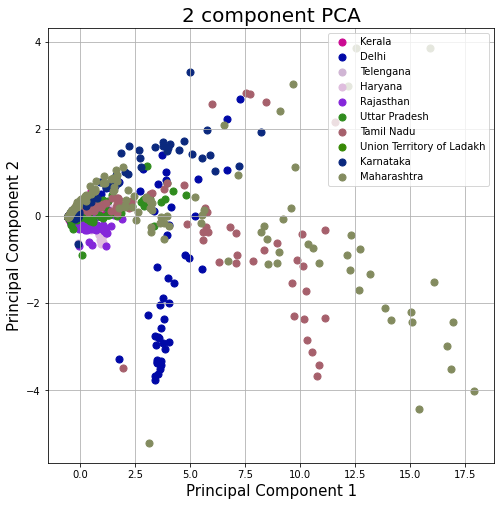

In [26]:
from random import randint
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = dataset['Name of State / UT'].unique()
targets
colors=[]
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Name of State / UT'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
              , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [28]:
pca.explained_variance_ratio_

array([0.90418932, 0.06871119])